In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_features = pd.read_csv("../data/features/features.csv")
df_labels = pd.read_csv("../data/labels/labels.csv")

print(df_features.head())
print(df_labels.head())


              filename       tempo  spectral_centroid    chroma       zcr  \
0   angry_song (1).mp3  129.199219        1378.115608  0.465009  0.039450   
1  angry_song (10).mp3   92.285156        1691.952188  0.426493  0.063452   
2  angry_song (11).mp3  151.999081        2514.341945  0.400642  0.115875   
3  angry_song (12).mp3  172.265625        1775.821972  0.443078  0.066181   
4  angry_song (13).mp3  123.046875        2252.840237  0.424491  0.073719   

       mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  
0 -201.127980  118.011100  17.125930  35.390965  11.905364  
1  -70.949554  123.959120   6.585755  27.209920   1.737244  
2  -69.276650   81.959816  -5.915376  13.897682  -6.748541  
3  -99.402240  111.444740   0.688108  25.701288   0.447008  
4  -88.900060   89.363220   5.241252  22.783154  13.811660  
              filename   mood
0   angry_song (1).mp3  angry
1  angry_song (10).mp3  angry
2  angry_song (11).mp3  angry
3  angry_song (12).mp3  angry
4  angry_song (13).mp

In [3]:
df = pd.merge(df_features, df_labels, on='filename')
df.head()

,filename,tempo,spectral_centroid,chroma,zcr,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mood
0,angry_song (1).mp3,129.199219,1378.115608,0.465009,0.039450,-201.127980,118.011100,17.125930,35.390965,11.905364,angry
1,angry_song (10).mp3,92.285156,1691.952188,0.426493,0.063452,-70.949554,123.959120,6.585755,27.209920,1.737244,angry
2,angry_song (11).mp3,151.999081,2514.341945,0.400642,0.115875,-69.276650,81.959816,-5.915376,13.897682,-6.748541,angry
3,angry_song (12).mp3,172.265625,1775.821972,0.443078,0.066181,-99.402240,111.444740,0.688108,25.701288,0.447008,angry
4,angry_song (13).mp3,123.046875,2252.840237,0.424491,0.073719,-88.900060,89.363220,5.241252,22.783154,13.811660,angry


In [4]:
X = df.drop(['filename', 'mood'], axis=1)
y = df['mood']

print(X.head())
print(y.head())

        tempo  spectral_centroid    chroma       zcr      mfcc_1      mfcc_2  \
0  129.199219        1378.115608  0.465009  0.039450 -201.127980  118.011100   
1   92.285156        1691.952188  0.426493  0.063452  -70.949554  123.959120   
2  151.999081        2514.341945  0.400642  0.115875  -69.276650   81.959816   
3  172.265625        1775.821972  0.443078  0.066181  -99.402240  111.444740   
4  123.046875        2252.840237  0.424491  0.073719  -88.900060   89.363220   

      mfcc_3     mfcc_4     mfcc_5  
0  17.125930  35.390965  11.905364  
1   6.585755  27.209920   1.737244  
2  -5.915376  13.897682  -6.748541  
3   0.688108  25.701288   0.447008  
4   5.241252  22.783154  13.811660  
0    angry
1    angry
2    angry
3    angry
4    angry
Name: mood, dtype: object


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (93, 9)
Test shape: (24, 9)


In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

       angry       0.38      0.50      0.43         6
    dramatic       0.33      0.40      0.36         5
       happy       0.40      0.67      0.50         3
    romantic       0.50      0.25      0.33         4
         sad       1.00      0.50      0.67         6

    accuracy                           0.46        24
   macro avg       0.52      0.46      0.46        24
weighted avg       0.55      0.46      0.47        24



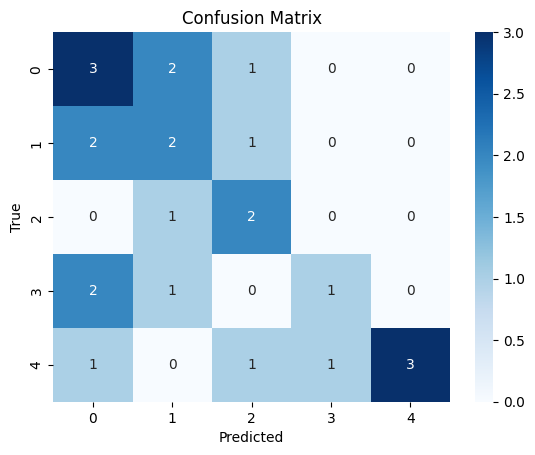

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import joblib

joblib.dump(model, '../models/music_mood_classifier.pkl')

print("Model saved")


Model saved
